# Multilayer Perceptron

Given a set of features $X = x_1, ..., x_m$ and a target $y \in \mathbb{R}^p$, the [__Multilayer Perceptron (MLP) algorithm__](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) learns a function $f: \mathbb{R}^m \to \mathbb{R}^p$ for the purposes of classification or regression. An MLP has an input layer, output layer, and one or more hidden layers (which may be non-linear). 

In this module, we build a MLP with an input layer ($L^0$) containing $784$ input nodes, 2 hidden layers ($L^1, L^2$), and $10$ output nodes ($L^{3}$).  

For $l = 1, 2, 3$, layer $l$ will have two phases:

* The preactivation phase $z^l = W^la^{l-1} + b^l,$ 
    - A weighted linear combination of postactivation values in the previous layer.
* The postactivation phase $a^l = \sigma(z^l).$ 
    - Passes the preactivation value through a chosen activation function elementwise. 
    
We denote $a^0 = x$, where $x$ is the current input data into our network. 

We use the Sigmoid Function as our activation function:
$$
\sigma(s) = \frac{1}{1+e^{-s}}.
$$

We use the Mean Squared Error as our cost function:
$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2.
$$


## Fashion_MNIST Data Set

The [Fashion MNIST dataset](https://keras.io/api/datasets/fashion_mnist/#load_data-function) consists of $60,000$ $28x28$ grayscale images of 10 fashion categories, along with a test set of $10,000$ images. Below are the labels and their corresponding descriptions:

    Label:Description

    0:T-shirt/top
    1:Trouser
    2:Pullover
    3:Dress
    4:Coat
    5:Sandal
    6:Shirt
    7:Sneaker
    8:Bag
    9:Ankle boot
    
---

The following packages are required to run the attached code:

- [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras)
- [Numpy](https://numpy.org/doc/)
- [Matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
- [Keras.datasets](https://keras.io/api/datasets/)

In [2]:
# import the relevant libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist

# The data structures train_X and test_X are stored as 3 dimensional tensors. 

In [31]:
# split the data into training set and testing set
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

# normalize the data for training
train_X = train_X/np.max(train_X)
test_X = test_X/np.max(train_X)

In [34]:
# flatten the training images into coloumn vectors. 
X = []
for x in train_X:
  X.append(x.flatten().reshape(784, 1))

# temporarily store encoded label vectors
Y = []
for y in train_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

# store the training data as a tuple
train_data = [p for p in zip(X, Y)]
p = train_data[0]
print(p[1])
print(train_y[0])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
9


In [35]:
# similarly with the testing data
X = []
for x in test_X:
  X.append(x.flatten().reshape(784, 1))

Y = []
for y in test_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

In [36]:
# define our activation function
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))

# define our cost function
def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]]
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

In order to begin calculating the gradient, we compute the output error, as well as the neuron error, as follows:

#### The Output Error

$$
\delta^{L-1} = \nabla_{a^{L-1}}C \otimes \sigma'(z^{L-1}) 
$$

#### The Neuron Error

$$
\delta^{l} = ((W^{l+1})^{\top} a^{l+1}) \otimes \sigma'(z^l)
$$

---

In [38]:
W, B = initialize_weights(layers=[784, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)
   

deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last

for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l])

alpha = 0.04
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]
    
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas


def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)


W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 1.208978368356998


Predicted Value = 7
Actual Value = 6


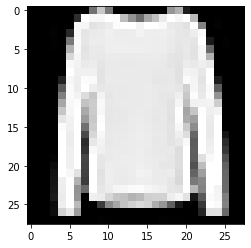

In [39]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

---

Observe that our first predicted value was incorrect - our algorithm predicted sneaker, even though the item is a shirt. Now, we will attempt to use Stochastic Gradient Descent to train our model. 

[__Stochastic Gradient Descent__](https://scikit-learn.org/stable/modules/sgd.html) is an iterative method used in optimization that is also utilized by machine learners to train models because it's highly efficient. We implement it for our data below. 

---

In [40]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")
    
    
stochastic_gradient_descent(W, B, train_data)

Initial Cost = 1.208978368356998
0 Cost = 0.1222268161459043
1 Cost = 0.10698037499297447
2 Cost = 0.09803004130197836


--- 

Notice that our cost decreases with each iteration. 

---

/Users/rachaelalfant/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Predicted Value = 1
Actual Value = 1


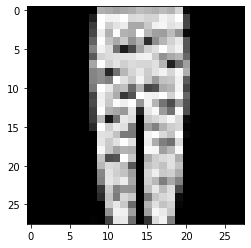

In [41]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

---

This time, our predicted value is correct! Now, using our code from above, we define a MLP class and train our data using the Mini-batch Gradient Descent algorithm, which is similar to the Gradient Descent algorithm except that it splits the training data into small "batches" or subsets. 

---

In [42]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")


  def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
      for j in range(0, data_length-batch_size, batch_size):
        delta_list = []
        A_list = []
        for p in data[j:j+batch_size]:
          A, deltas = self.deltas_dict(p)
          delta_list.append(deltas)
          A_list.append(A)

        for i in range(1, self.L):
          self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
          self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")
    
    
net = MultilayerPerceptron(layers=[784, 100, 100, 10])
net.mini_batch_gradient_descent(train_data)

Initial Cost = 1.533849394221658
2 Cost = 0.19551198599029804


In [43]:
net.MSE(test_data)

/Users/rachaelalfant/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.2446645729472044

Predicted Value = 7
Actual Value = 7


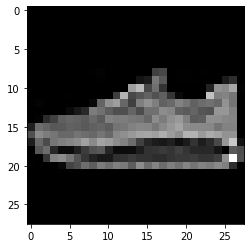

In [47]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(net.forward_pass(test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

---

Our predicted value is correct again! Although our cost decreased with each iteration again, our final cost value was lower for Stochastic Gradient Descent than for Mini-Batch Gradient Descent. 

---